In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
# Load the cleaned dataset
df = pd.read_csv("../data/interim/cleaned_house_data_v1.csv")
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (17890, 5)


,size_sq_ft,propertyType,bedrooms,localityName,price
0,400,Independent Floor,1,Swasthya Vihar,9000
1,1050,Apartment,2,mayur vihar phase 1,20000
2,2250,Independent Floor,2,Swasthya Vihar,28000
3,1350,Independent Floor,2,Krishna Nagar,28000
4,450,Apartment,2,New Ashok Nagar,12500


### Bedrooms analysis and cleaning

In [42]:
print("\n--- Bedrooms Value Counts ---")
print(df['bedrooms'].value_counts())


--- Bedrooms Value Counts ---
2     5902
3     5532
1     5214
4     1127
5       79
6       17
10      10
7        3
8        2
9        2
15       1
12       1
Name: bedrooms, dtype: int64


In [43]:
# Check for unusually high bedroom counts
print("\n--- Listings with Bedrooms > 7 ---")
print(df[df['bedrooms'] > 7])


--- Listings with Bedrooms > 7 ---
       size_sq_ft       propertyType  bedrooms        localityName    price
3352         4500  Independent House        10  New Friends Colony   400000
3525         4050  Independent House        10         Vasant Kunj   330000
4340         4500  Independent House        10  New Friends Colony   350000
4393         9000  Independent House        10     East of Kailash   350000
4394         4500  Independent House        10          Green Park   400000
4789         9000              Villa        10       Maharani Bagh   500000
9143        12000          Apartment        10           Pitampura   450000
13867       15515              Villa        15          India Gate  4011010
13868       16521  Independent House        10          Tilak Marg  3746419
13972       15562  Independent House        12      Aurungzeb Road  5885646
14000       11010              Villa         8          Tilak Marg  4010101
14620       10000  Independent Floor        10     S

In [44]:
# Outlier detection for bedrooms
upper_limit = df['bedrooms'].quantile(0.9992)
lower_limit = df['bedrooms'].quantile(0.0008)
print(f"\nBedroom Upper Limit: {upper_limit}")
print(f"Bedroom Lower Limit: {lower_limit}")


Bedroom Upper Limit: 8.0
Bedroom Lower Limit: 1.0


In [45]:
# Keep realistic bedroom counts (1 < bedrooms < 8)
df = df[(df['bedrooms'] > 1) & (df['bedrooms'] < 9)]
print("After bedroom filtering:", df.shape)

After bedroom filtering: (12662, 5)


In [46]:
df['bedrooms'].value_counts()

2    5902
3    5532
4    1127
5      79
6      17
7       3
8       2
Name: bedrooms, dtype: int64

### Locality cleaning


In [47]:
print("\n--- Locality Name Value Counts (Before Cleaning) ---")
print(df['localityName'].value_counts())


--- Locality Name Value Counts (Before Cleaning) ---
Paschim Vihar                821
Patel Nagar                  647
Chattarpur                   545
Pitampura                    484
Malviya Nagar                282
                            ... 
Lalita Park                    1
Pushpanjali Enclave            1
Block PP Poorvi Pitampura      1
Inderpuri                      1
Jhandewalan                    1
Name: localityName, Length: 678, dtype: int64


In [48]:
# Strip whitespace
df['localityName'] = df['localityName'].apply(lambda x: x.strip() if isinstance(x, str) else x)

In [49]:
# Replace rare localities with 'other'
location_count = df['localityName'].value_counts()
location_count_less_than_10 = location_count[location_count <= 10]
df['localityName'] = df['localityName'].apply(lambda x: 'other' if x in location_count_less_than_10 else x)

In [50]:
df['localityName'].value_counts()
# value counts reduced to 153 from 781

other                   1369
Paschim Vihar            821
Patel Nagar              647
Chattarpur               545
Pitampura                484
                        ... 
Dwarka 11 Sector          12
Anand Niketan             12
Jamia Nagar               12
Mayur Vihar Phase 2       11
Khanpur Krishna Park      11
Name: localityName, Length: 153, dtype: int64

### Outlier detection in price


In [51]:
print("\n--- Price Outliers (Below 1300) ---")
print(df[df['price'] < 1300])


--- Price Outliers (Below 1300) ---
Empty DataFrame
Columns: [size_sq_ft, propertyType, bedrooms, localityName, price]
Index: []


### Feature creation - Price per sqft

In [52]:
print("\n--- Creating price_per_sqft feature ---")
# Handle division safely
df['price_per_sqft'] = np.where(df['size_sq_ft'] > 0,
                                    df['price'] / df['size_sq_ft'],
                                    np.nan)

df.head()



--- Creating price_per_sqft feature ---


,size_sq_ft,propertyType,bedrooms,localityName,price,price_per_sqft
1,1050,Apartment,2,mayur vihar phase 1,20000,19.047619
2,2250,Independent Floor,2,Swasthya Vihar,28000,12.444444
3,1350,Independent Floor,2,Krishna Nagar,28000,20.740741
4,450,Apartment,2,New Ashok Nagar,12500,27.777778
5,600,Independent House,2,New Ashok Nagar,10000,16.666667


### Locality Average Price

In [54]:
location_price = df.groupby('localityName')['price'].mean()
df['location_avg_price'] = df['localityName'].map(location_price)

df.head()

,size_sq_ft,propertyType,bedrooms,localityName,price,price_per_sqft,location_avg_price
1,1050,Apartment,2,mayur vihar phase 1,20000,19.047619,19561.660079
2,2250,Independent Floor,2,Swasthya Vihar,28000,12.444444,32710.714286
3,1350,Independent Floor,2,Krishna Nagar,28000,20.740741,25532.051282
4,450,Apartment,2,New Ashok Nagar,12500,27.777778,12721.019108
5,600,Independent House,2,New Ashok Nagar,10000,16.666667,12721.019108


In [55]:
print("\nFinal DataFrame shape:", df.shape)
print("\nFeature engineering completed successfully!")


Final DataFrame shape: (12662, 7)

Feature engineering completed successfully!


In [56]:
df.to_csv("../data/processed/final_data.csv", index=False)
print("✅ Feature Engineering complete!")

✅ Feature Engineering complete!


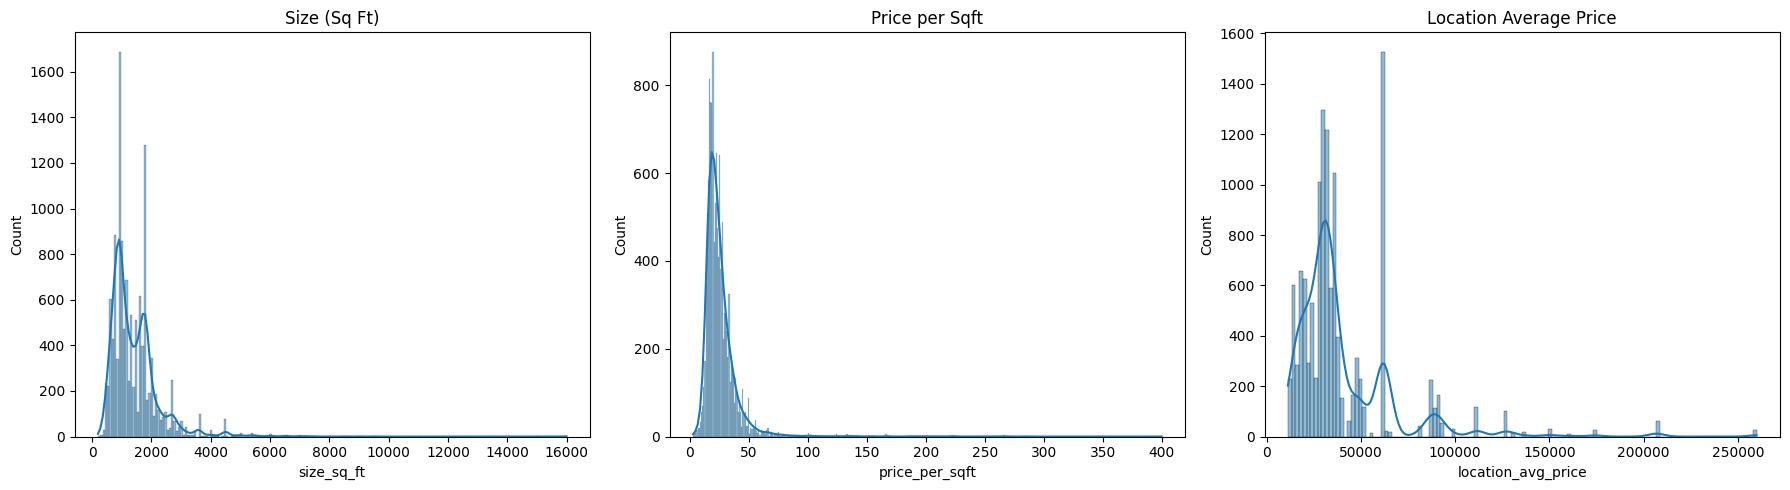

In [59]:

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['size_sq_ft'], kde=True, ax=axs[0])
axs[0].set_title('Size (Sq Ft)')

sns.histplot(df['price_per_sqft'], kde=True, ax=axs[1])
axs[1].set_title('Price per Sqft')

sns.histplot(df['location_avg_price'], kde=True, ax=axs[2])
axs[2].set_title('Location Average Price')

plt.tight_layout()
